In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 

c:\Users\Victor.moreira\AppData\Local\miniconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [12]:
tradingCost = 0.0005

spy = yf.download('SPY', start='1980-01-01', auto_adjust=False)
spy['ret'] = spy['Adj Close'].pct_change()
spy['wday'] = spy.index.dayofweek
spy['buy'] = (spy['ret'].shift(1) > 0.07)
spy['pnl'] = (spy['ret'] * spy['buy'].astype(int)) - ((spy['ret'] * spy['buy'].astype(int)) * tradingCost)


[*********************100%***********************]  1 of 1 completed


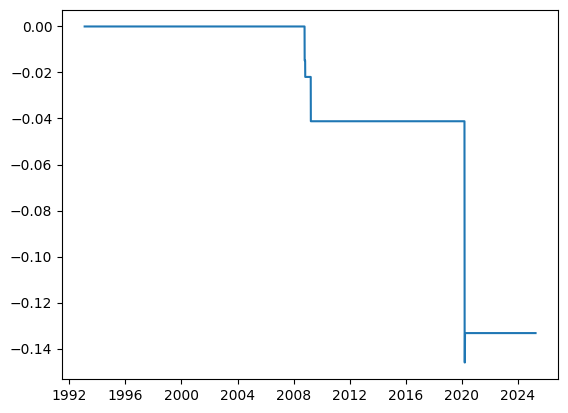

In [13]:
plt.show(plt.plot((1+spy['pnl']).cumprod()-1))

In [11]:
spy[spy['buy']].loc[:,['buy', 'pnl']].tail()

Price,buy,pnl
Ticker,,
Date,,
2008-10-14,True,-0.014793
2008-10-29,True,-0.007249
2020-03-16,True,-0.109369
2020-03-25,True,0.014963
